# Programming assignment #1


>  **n**...: **Fibonacci(n)** <br>
> `0` : `0` <br>
> `1` : `1` <br>
> `2` : `1` <br>
> `3` : `2` <br>
> `4` : `3` <br>

### Recursive approach :

In [79]:
def recFib(n):
    if (n==0):
        return 0
    if(n<=2):
        return 1
    return recFib(n-1)+recFib(n-2)

### DP topDown approach :

In [80]:
memoize=[-1 for i in range(100)]
def topdownFib(n,memoize):
    if (n==0):
        return 0
    if(n<=2):
        return 1
    if(memoize[n]!=-1):
        return memoize[n] 
    memoize[n]=topdownFib(n-1,memoize)+topdownFib(n-2,memoize)
    return memoize[n]


### DP bottomUp approach :

In [81]:
def bottomUpFib(n):
    a=0
    b=1
    for i in range(n):
        temp=a
        a=b
        b=temp+b
    return a

<hr>

### Testing code :

> I removed the last 2 test cases for the recursive approach because it took me more than 1 hour and didn't finish

In [82]:
testCases= [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 48, 64]
recTestCases= [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]

for n in testCases:
    print(bottomUpFib(n),end=" ")
print('')
for n in testCases:
    mem=memoize.copy()
    print(topdownFib(n,mem),end=" ")
print('')
for n in recTestCases:
        print(recFib(n),end=" ")
    

3 21 144 987 6765 46368 317811 2178309 14930352 102334155 4807526976 10610209857723 
3 21 144 987 6765 46368 317811 2178309 14930352 102334155 4807526976 10610209857723 
3 21 144 987 6765 46368 317811 2178309 14930352 102334155 

### Measuring running time :

In [83]:
import time
import pandas as pd

def currentTime():    #Current time in microseconds
    microseconds = int(round(time.time() * 10**6))
    return microseconds

def calcElapsedTime(Fib,testCases,topDown=False):
    funcTime=[]
    for n in testCases:
        if (topDown==True): #initialize memoization list if the function is topDown
            mem=memoize.copy()
        start=currentTime()
        if (topDown==True):
            Fib(n,mem)
        else :
            Fib(n)
        end=currentTime()
        total=end-start
        funcTime.append(total)
    return funcTime
        

In [94]:
bottomUpTime=calcElapsedTime(bottomUpFib,testCases)
bottomUpTime

[8, 3, 4, 4, 5, 5, 6, 7, 7, 8, 9, 13]

In [93]:
topdownTime=calcElapsedTime(topdownFib,testCases,True)
topdownTime

[6, 4, 4, 5, 7, 8, 9, 10, 12, 13, 16, 21]

In [86]:
recursiveTime=calcElapsedTime(recFib,recTestCases)
recursiveTime.extend([None,None])
recursiveTime

[7, 8, 52, 376, 2590, 17807, 107555, 513136, 3504776, 22083086, None, None]

In [95]:
df = pd.DataFrame({"testCase":testCases,"bottomUpTime":bottomUpTime,"topdownTime":topdownTime,"recursiveTime":recursiveTime})
print (df.to_string(index=False))

 testCase  bottomUpTime  topdownTime  recursiveTime
        4             8            6            7.0
        8             3            4            8.0
       12             4            4           52.0
       16             4            5          376.0
       20             5            7         2590.0
       24             5            8        17807.0
       28             6            9       107555.0
       32             7           10       513136.0
       36             7           12      3504776.0
       40             8           13     22083086.0
       48             9           16            NaN
       64            13           21            NaN


<hr>

### Ploting Excution time Curve :

In [96]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
def plotGraph(x,y,Label,title,xStep,yStep):    
    fig,Graph = plt.subplots(1,1)
    Graph.plot(x,y,label=Label,marker='o')
    plt.xlabel('testCase')
    plt.ylabel('Time(uS)')
    
    plt.title(title)
    Graph.legend()
    Graph.xaxis.set_major_locator(ticker.MultipleLocator(xStep))
    Graph.yaxis.set_major_locator(ticker.MultipleLocator(yStep))



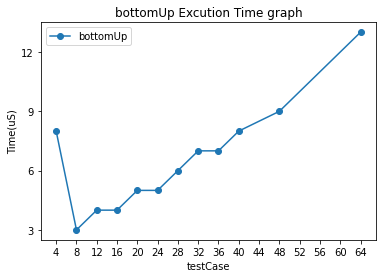

In [97]:
plotGraph(testCases,bottomUpTime,'bottomUp',"bottomUp Excution Time graph",4,3)


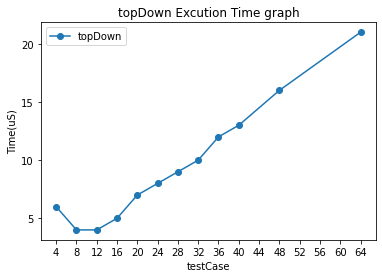

In [98]:
plotGraph(testCases,topdownTime,'topDown',"topDown Excution Time graph",4,5)

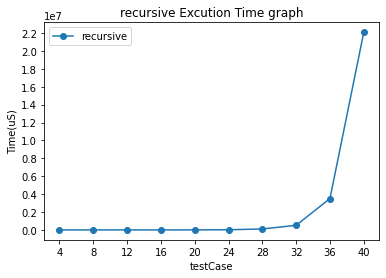

In [99]:
plotGraph(recTestCases,recursiveTime[:-2],'recursive',"recursive Excution Time graph",4,2000000)